<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/logisticregressionP1Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [60]:
dataset = pd.read_csv('/content/diabetes.csv') 
dataset.head(20) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [62]:

X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values #all variables in dataset
Y = dataset.iloc[:, 8].values   #outcome values 


In [63]:

X[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [67]:
#Now we’ll split our Data set into Training Data and Test Data.20% test 80% train
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0) 

In [68]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and Estimated
 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [69]:
#Import LogisticRegression from sklearn.linear_model 
#Make an instance classifier of the object LogisticRegression and give random_state =  
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [70]:
Y_pred = classifier.predict(X_test)

In [71]:
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0])

In [72]:
#Using Confusion matrix we can get accuracy of our model. 
 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[98,  9],
       [18, 29]])

In [73]:

#Let's evaluate the model using model evaluation metrics such as accuracy, precision, a
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

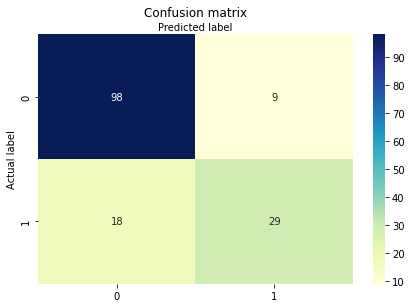

In [74]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap. 
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [34]:
#import warnings
#warnings.filterwarnings('ignore') 
#from matplotlib.colors import ListedColormap 
#X_set, Y_set = X_test, Y_test 
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() 
#                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max()
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X_train),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max()) 
#plt.ylim(X2.min(), X2.max()) 
#for i, j in enumerate(np.unique(Y_set)): 
#    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
#                c = ListedColormap(('yellow', 'blue'))(i), label = j) 
#plt.title('Logistic Regression (Test set)') 
#plt.xlabel('Age') 
#plt.ylabel('Estimated Salary') 
#plt.legend() 
#plt.show() 

SyntaxError: ignored

In [55]:
#Now let's try Naive Gaussian Bays 
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train) 

GaussianNB()

In [56]:
Y2_pred  =  classifier.predict(X_test) 
Y2_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cm = confusion_matrix(Y_test, Y2_pred) 
ac = accuracy_score(Y_test, Y2_pred) 
cm

array([[114,  16],
       [ 29,  33]])

In [58]:
ac

0.765625